## Auto-Regressive Moving Average (ARMA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_copy['market_val'] = df_copy.ftse

In [4]:
df_copy = df_copy.drop(['spx','dax', 'ftse', 'nikkei'], axis = 1)
df_copy.head()

,market_val
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [5]:
df_copy['returns'] = df_copy.market_val.pct_change(1).mul(100)

In [6]:
df_copy.isnull().sum()

market_val    0
returns       1
dtype: int64

## ARMA (1,1)

In [7]:
model_arma_ret_1 = ARMA(df_copy.returns[1:], order = (1,1))
results_arma_ret_1 = model_arma_ret_1.fit()
results_arma_ret_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood               -9582.339
Method:                       css-mle   S.D. of innovations              1.114
Date:                Mon, 19 Oct 2020   AIC                          19172.679
Time:                        11:16:10   BIC                          19199.657
Sample:                    01-10-1994   HQIC                         19182.026
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.753      0.080      -0.002       0.040
ar.L1.returns     0.8177      0.063     12.964      0.000       0.694       0.941
ma.L1.returns    -0.8593      0.056    -15.284      0.000      -0.970      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2229           +0.0000j            1.2229            0.0000
MA.1            1.1637           +0.0000j            1.1637            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_ar_ret_1 = ARMA(df_copy.returns[1:], order = (1,0))
model_ma_ret_1 = ARMA(df_copy.returns[1:], order = (0,1))

In [9]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [10]:
print("For ARMA Vs MA: \n p_val = " +str(LLR_test(model_ma_ret_1, model_arma_ret_1)))
print("For ARMA Vs AR: \n p_val = " +str(LLR_test(model_ar_ret_1, model_arma_ret_1)))

For ARMA Vs MA: 
 p_val = 0.0
For ARMA Vs AR: 
 p_val = 0.0


Here we can see pval is less than 0.05 this states that ARMA(1,1) model better for returns than AR(1) and MA(1) models.

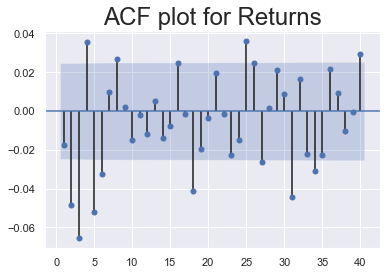

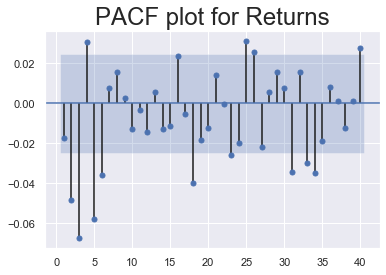

In [11]:
sgt.plot_acf(df_copy.returns[1:], zero = False, lags = 40)
plt.title("ACF plot for Returns", size = 24);
sgt.plot_pacf(df_copy.returns[1:], zero = False, lags = 40)
plt.title("PACF plot for Returns", size = 24);

Here the plots depicts that from ACF we can say that not more than 8 lags are required for AR and PACF states that not more than 6 lags are required for MA model for giving better results. Thus instead considering ARMA(8,6) we'll consider ARMA(4,3).

## Higher Lag ARMA models

In [12]:
model_arma_ret_33 = ARMA(df_copy.returns[1:], order = (3,3))
results_arma_ret_33 = model_arma_ret_33.fit()
print(results_arma_ret_33.summary())
print("LLR test results : \n p_val = " +str(LLR_test(model_arma_ret_1, model_arma_ret_33, DF = 4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 3)   Log Likelihood               -9564.828
Method:                       css-mle   S.D. of innovations              1.111
Date:                Mon, 19 Oct 2020   AIC                          19145.656
Time:                        11:16:26   BIC                          19199.612
Sample:                    01-10-1994   HQIC                         19164.351
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.664      0.096      -0.003       0.041
ar.L1.returns    -0.1278      0.106     -1.202      0.229      -0.336       0.081
ar.L2.returns    -0.2079      0.097     

Result states that ARMA(3,3) is better than ARMA(1,1).

In [13]:
model_arma_ret_32 = ARMA(df_copy.returns[1:], order = (3,2))
results_arma_ret_32 = model_arma_ret_32.fit()
print(results_arma_ret_32.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 2)   Log Likelihood               -9568.878
Method:                       css-mle   S.D. of innovations              1.112
Date:                Mon, 19 Oct 2020   AIC                          19151.755
Time:                        11:16:40   BIC                          19198.967
Sample:                    01-10-1994   HQIC                         19168.113
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.472      0.141      -0.006       0.044
ar.L1.returns    -0.6818      0.113     -6.025      0.000      -0.904      -0.460
ar.L2.returns    -0.3567      0.157     

In [ ]:
model_arma_ret_23 = ARMA(df_copy.returns[1:], order = (2,3))
results_arma_ret_23 = model_arma_ret_23.fit()
print(results_arma_ret_23.summary())

In [ ]:
model_arma_ret_22 = ARMA(df_copy.returns[1:], order = (2,2))
results_arma_ret_22 = model_arma_ret_22.fit()
print(results_arma_ret_22.summary())

In [ ]:
model_arma_ret_13 = ARMA(df_copy.returns[1:], order = (1,3))
results_arma_ret_13 = model_arma_ret_13.fit()
print(results_arma_ret_13.summary())

In [ ]:
print("ARMA (1,3): \n LL = ", results_arma_ret_13.llf,"\t AIC = ", results_arma_ret_13.aic)
print("ARMA (3,2): \n LL = ", results_arma_ret_32.llf,"\t AIC = ", results_arma_ret_32.aic)

Thus we conclude ARMA(1,3) is better than ARMA(3,2)

## Residuals for Returns

In [ ]:
df_copy['res_ret_arma13'] = results_arma_ret_13.resid[1:]

In [ ]:
df_copy.res_ret_arma13.plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

In [ ]:
sgt.plot_acf(df_copy.res_ret_arma13[2:], zero = False, lags = 40)
plt.title("ACF plot for Residulas", size = 24);

## Revaluating Model Selection

In [ ]:
model_arma_ret_51 = ARMA(df_copy.returns[1:], order = (5,1))
results_arma_ret_51 = model_arma_ret_51.fit()
print(results_arma_ret_51.summary())

In [ ]:
model_arma_ret_15 = ARMA(df_copy.returns[1:], order = (1,5))
results_arma_ret_15 = model_arma_ret_15.fit()
print(results_arma_ret_15.summary())

In [ ]:
print("ARMA (1,5): \n LL = ", results_arma_ret_15.llf,"\t AIC = ", results_arma_ret_15.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

In [ ]:
print("ARMA (1,3): \n LL = ", results_arma_ret_13.llf,"\t AIC = ", results_arma_ret_13.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

Thus we can see low AIC hence ARMA(5,1) is the best model so far.

## Residuals for New Model

In [ ]:
df_copy['res_ret_arma51'] = results_arma_ret_51.resid
df_copy.res_ret_arma51.plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

In [ ]:
sgt.plot_acf(df_copy.res_ret_arma51[1:], zero = False, lags = 40)
plt.title("ACF plot for Residulas", size = 24);

Random residulas as usually prefered.

## ARMA Models for Prices

In [ ]:
sgt.plot_acf(df_copy.market_val, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Prices", size = 20);

In [ ]:
sgt.plot_pacf(df_copy.market_val, alpha = 0.05, zero = False, lags = 40, method = ('ols'))
plt.title("PACF plot for Prices", size = 20);

In [ ]:
model_arma_price_1 = ARMA(df_copy.market_val, order = (1,1))
results_arma_price_1 = model_arma_price_1.fit()
results_arma_price_1.summary()

In [ ]:
df_copy['res_price_arma1'] = results_arma_price_1.resid
sgt.plot_acf(df_copy.res_price_arma1, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Residuals of Prices", size = 20);

In [ ]:
model_arma_price_66 = ARMA(df_copy.market_val, order = (6,6))
results_arma_price_66 = model_arma_price_66.fit(start_ar_lags = 14)
print(results_arma_price_66.summary())

In [ ]:
model_arma_price_56 = ARMA(df_copy.market_val, order = (5,6))
results_arma_price_56 = model_arma_price_56.fit(start_ar_lags = 14)
print(results_arma_price_56.summary())

In [ ]:
model_arma_price_61 = ARMA(df_copy.market_val, order = (6,1))
results_arma_price_61 = model_arma_price_61.fit(start_ar_lags = 14)
print(results_arma_price_61.summary())

In [ ]:
print("ARMA (5,6): \n LL = ", results_arma_price_56.llf,"\t AIC = ", results_arma_price_56.aic)
print("ARMA (6,1): \n LL = ", results_arma_price_61.llf,"\t AIC = ", results_arma_price_61.aic)

Thus ARMA(6,1) should be preferred over ARMA(5,6)

In [ ]:
df_copy['res_price_arma61'] = results_arma_price_61.resid
sgt.plot_acf(df_copy.res_price_arma1, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Residuals of Prices", size = 20);

In [ ]:
print("ARMA (5,6): \n LL = ", results_arma_price_56.llf,"\t AIC = ", results_arma_price_56.aic)
print("ARMA (6,1): \n LL = ", results_arma_price_61.llf,"\t AIC = ", results_arma_price_61.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

Thus we can see that ARMA model performs better for Stationary data